The MNIST fashion dataset which contains 70000 clothing fashion images. Our task is to train an image classification model with neural networks

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train.shape

(60000,)

In [9]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [10]:
y_train[5]

2

having a look at the images

In [16]:
def plot(X, y, index):
  plt.figure(figsize= (15, 2))
  plt.imshow(X[index])
  plt.xlabel(y[index])


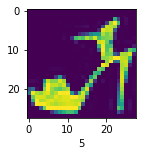

In [17]:
plot(X_train, y_train, 9)

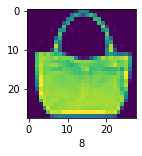

In [18]:
plot(X_train, y_train, 100)

normalize the dataset

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train.shape

(60000, 28, 28)

build an artificial neural network

In [21]:
ann = models.Sequential([
    layers.Flatten (input_shape= (28, 28)),
    layers.Dense(3000, activation= "relu"),
    layers.Dense(1000, activation= "relu"),
    layers.Dense(10, activation= "sigmoid"),

])

ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 3000)              2355000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 5,366,010
Trainable params: 5,366,010
Non-trainable params: 0
_________________________________________________________________


In [22]:
ann.compile(optimizer= "sgd", loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])
ann.fit(X_train, y_train, epochs= 30)

Epoch 1/30
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6402 - accuracy: 0.7910
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4530 - accuracy: 0.8425
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4114 - accuracy: 0.8572
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3859 - accuracy: 0.8656
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.8715
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3507 - accuracy: 0.8774
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3365 - accuracy: 0.8820
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3252 - accuracy: 0.8847
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3138 - accuracy: 0.8884
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.304

93.47% accuracy with 30 epochs

In [23]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3147 - accuracy: 0.8896


[0.3146858513355255, 0.8895999789237976]

88.96% accuracy on the test set

In [24]:
y_pred = ann.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[4.9454018e-02, 1.9425601e-02, 6.7056760e-02, ..., 9.8853672e-01,
        5.3002852e-01, 9.9995124e-01],
       [9.8879725e-01, 1.7657451e-02, 9.9999964e-01, ..., 4.5921569e-04,
        4.4643514e-02, 1.9014788e-04],
       [9.7929895e-01, 1.0000000e+00, 5.6515318e-01, ..., 7.5777862e-03,
        1.2827550e-01, 1.0475721e-03],
       ...,
       [9.6342713e-01, 2.5983069e-03, 9.4174027e-01, ..., 5.0288223e-02,
        9.9995172e-01, 1.0129841e-03],
       [8.0590028e-01, 9.9999774e-01, 5.8685863e-01, ..., 2.1319026e-02,
        6.9249384e-02, 4.2082477e-02],
       [5.8046255e-02, 3.4315605e-02, 2.5476357e-01, ..., 9.5357805e-01,
        5.6941777e-01, 1.4939095e-01]], dtype=float32)

In [26]:
classes = np.argmax(y_pred, axis= 1)
classes

array([9, 2, 1, ..., 8, 1, 5])

In [41]:
np.unique(classes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

classification report

In [44]:
 from sklearn.metrics import classification_report, confusion_matrix
 print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.88      0.91      0.89      1000
           4       0.75      0.90      0.82      1000
           5       0.95      0.98      0.96      1000
           6       0.78      0.65      0.71      1000
           7       0.96      0.93      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Text(69.0, 0.5, 'Truth')

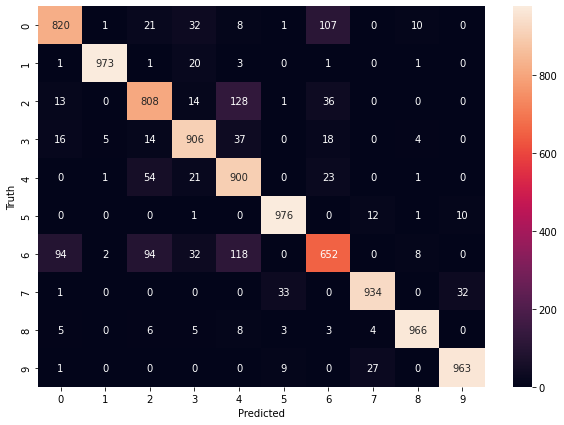

In [46]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels= y_test, predictions= classes)

plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot= True, fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")